<a href="https://colab.research.google.com/github/andrewdr14/MSELoss-vs-AELoss/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model 1 weights: tensor([0.4615])
Model 1 bias: tensor([0.6340])
Model 2 weights: tensor([0.2995])
Model 2 bias: tensor([0.7000])
Model 1 test loss: 0.006127660162746906
Model 2 test loss: 0.0005250930553302169


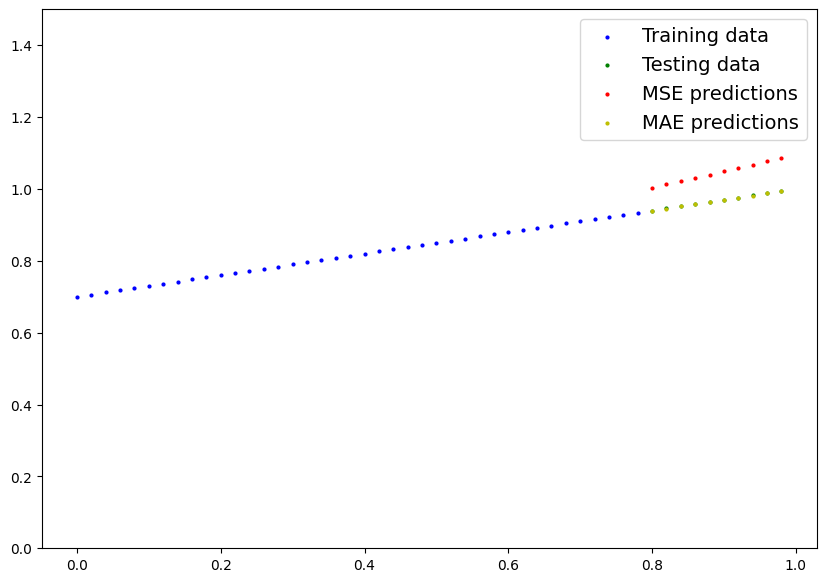

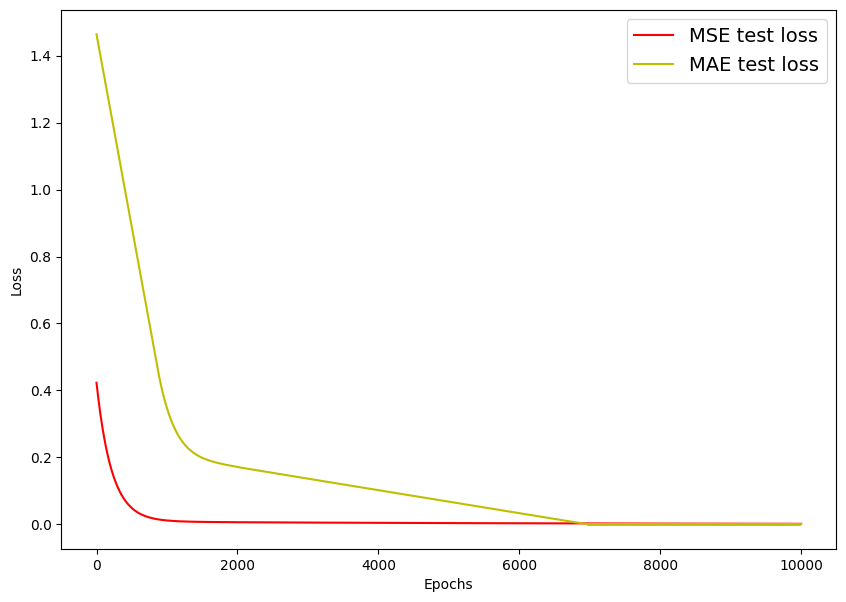

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

#Data manipulation phase

weight = 0.3
bias = 0.7

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


#Linear regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


model_1 = LinearRegressionModel() #Model 1, uses a MSE loss function
model_2 = LinearRegressionModel() #Model 2, uses a MAE loss function
loss_fn_1 = nn.MSELoss() #MSE Loss function
loss_fn_2 = nn.L1Loss() #MAE Loss function
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.001)
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

#Training loop

epochs = 10000

epoch_count = []
test_loss_values_1 = []
test_loss_values_2 = []

for epoch in range(epochs):
    model_1.train()
    model_2.train()
    y_pred_1 = model_1(X_train)
    y_pred_2 = model_2(X_train)

    loss_1 = loss_fn_1(y_pred_1, y_train)
    loss_2 = loss_fn_2(y_pred_2, y_train)

    optimizer_1.zero_grad()
    optimizer_2.zero_grad()

    loss_1.backward()
    loss_2.backward()

    optimizer_1.step()
    optimizer_2.step()

    epoch_count.append(epoch)
    test_loss_values_1.append(loss_1.item())
    test_loss_values_2.append(loss_2.item())


#Model evaluation phase

model_1.eval()
model_2.eval()
with torch.inference_mode():
    test_pred_1 = model_1(X_test)
    test_pred_2 = model_2(X_test)
    test_loss_1 = loss_fn_1(test_pred_1, y_test)
    test_loss_2 = loss_fn_2(test_pred_2, y_test)


print(f"Model 1 weights: {model_1.state_dict()['weight']}")
print(f"Model 1 bias: {model_1.state_dict()['bias']}")
print(f"Model 2 weights: {model_2.state_dict()['weight']}")
print(f"Model 2 bias: {model_2.state_dict()['bias']}")


#Visualisation

with torch.inference_mode(): #Removes gradient tracking

    train_test_1 = model_1(X_test)
    train_test_2 = model_2(X_test)

    test_loss_1 = loss_fn_1(train_test_1, y_test)
    test_loss_2 = loss_fn_2(train_test_2, y_test)

    print(f"Model 1 test loss: {test_loss_1}")
    print(f"Model 2 test loss: {test_loss_2}")

    y_preds_1 = model_1(X_test)
    y_preds_2 = model_2(X_test)


    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
    plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
    plt.scatter(X_test, y_preds_1, c="r", s=4, label="MSE predictions")
    plt.scatter(X_test, y_preds_2, c="y", s=4, label="MAE predictions")
    plt.ylim(0,1.5)
    plt.legend(prop={"size": 14})
    plt.show()

    plt.figure(figsize=(10, 7))
    plt.plot(epoch_count, test_loss_values_1, c="r", label="MSE test loss")
    plt.plot(epoch_count, test_loss_values_2, c="y", label="MAE test loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(prop={"size": 14})
    plt.show()





In [2]:

#Saving the model (only the parameters, state_dict)

from pathlib import Path


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "linear_regression_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)








In [3]:
#Loading the model (only the parameters, if we load it in another environment, we would need to redefine our LinearRegressionModel class)

model_3 = LinearRegressionModel()
model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


model_3.state_dict()






<ipython-input-3-5d0fd56a8eb6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weight', tensor([0.2995])), ('bias', tensor([0.7000]))])